Presuming the data is tabular and has rows and columns...
I look for a manifest or README file that usually explains what the columns are.
I look for columns that could be used as unique identifiers or could be primary/frgn keys in a db table.
I look at the names of all the columns to understand the domain and if I don't know what a column represents then I make a note of it to find out more.
I look for the data type used for each column.
I look for each numerical column what the range of values are, what are some basic stats - min/max/mean/mode/std.dev.
If the data is in a domain I know then I make a note of if each columns numerical values make sense (does a temperature of -9000 degrees make sense or is it a sensor malfunction / no-read value.)
I look for incomplete rows and if anything is blank, why is that?
I suppose if you understand all of those you should be ready to load the data into a db or for further analytics.
Practically you want to understand the magnitude of the data how many columns and rows does an average payload or batch contain?
Can the data fit in memory or not?
Does the data come in chunks or is it streamed somehow?

In [28]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv('googleplaystore_clean_data.csv')

In [30]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,lastupdate
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,-213
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,-205
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,-7
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,-61
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,-49


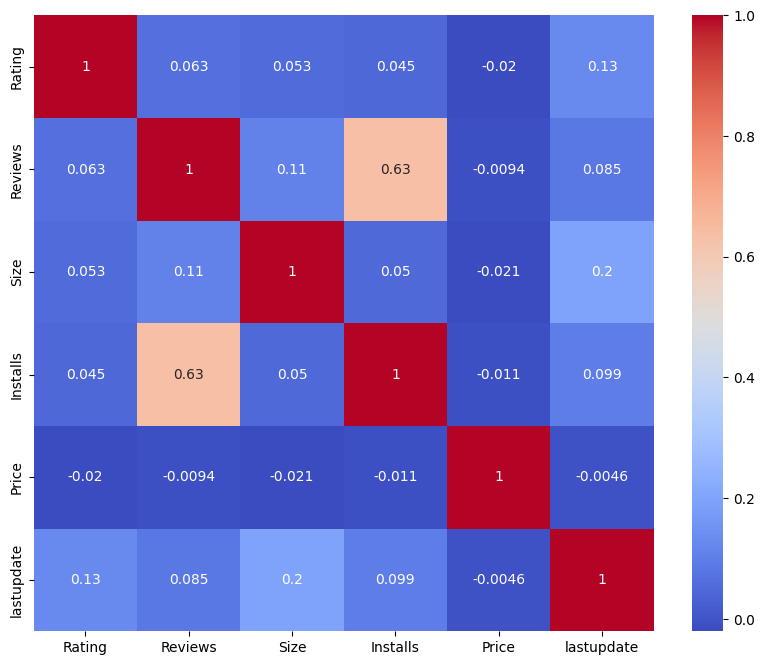

In [31]:
df.drop(['Category', 'Type', 'Content_Rating'], axis=1).corr()

# draw heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(['Category', 'Type', 'Content_Rating'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

High correlation between Installs and number of reviews, let drop Installs

In [32]:
columns = df.columns.tolist()
columns = " + ".join([c for c in columns if c not in ['Rating', 'Installs']])
columns

'Category + Reviews + Size + Type + Price + Content_Rating + lastupdate'

In [33]:
df.drop(df[df['Content_Rating'] == 'Unrated'].index, inplace=True)

In [34]:
# split data into train and test, 80% train, 20% test, random_state=42
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [39]:
columns = 'Reviews + Size + Price + Content_Rating + lastupdate'
linear_regression = smf.ols("Rating ~ %s"%columns, data=train)
linear_regression_results = linear_regression.fit()
linear_regression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     21.04
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           6.42e-32
Time:                        11:34:08   Log-Likelihood:                -5744.4
No. Observations:                8284   AIC:                         1.151e+04
Df Residuals:                    8275   BIC:                         1.157e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          4.4891      0.484      9.266      0.000       3.539       5.439
Content_Rating[T.Everyone]        -0.2589      0.484     -0.534      0.593      -1.208       0.691
Content_Rating[T.Everyone 10+]    -0.2131      0.485     -0.439      0.660      -1.164       0.738
Content_Rating[T.Mature 17+]      -0.3449      0.485     -0.711      0.477      -1.296       0.606
Content_Rating[T.Teen]            -0.2289      0.485     -0.472      0.637      -1.179       0.721
Reviews                          8.57e-09   2.04e-09      4.206      0.000    4.58e-09    1.26e-08
Size                               0.0003      0.000      1.166      0.244      -0.000       0.001
Price                             -0.0005      0.000     -1.689      0.091      -0.001    8.81e-05
lastupdate                         0.0001   1.36e-05     10.423      0.000       0.000       0.000
==============================================================================
Omnibus:                     3835.562   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26476.119
Skew:                          -2.110   Prob(JB):                         0.00
Kurtosis:                      10.675   Cond. No.                     5.43e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
columns = 'Installs'
linear_regression = smf.ols("Rating ~ %s"%columns, data=train)
linear_regression_results = linear_regression.fit()
linear_regression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     13.77
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           0.000207
Time:                        11:38:23   Log-Likelihood:                -5820.9
No. Observations:                8284   AIC:                         1.165e+04
Df Residuals:                    8282   BIC:                         1.166e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1988      0.005    770.700      0.000       4.188       4.209
Installs    2.382e-10   6.42e-11      3.711      0.000    1.12e-10    3.64e-10
==============================================================================
Omnibus:                     3817.226   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25771.547
Skew:                          -2.106   Prob(JB):                         0.00
Kurtosis:                      10.545   Cond. No.                     8.62e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.62e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
columns = 'Category + Installs + Size + Type + Price + Content_Rating + lastupdate'
linear_regression = smf.ols("Rating ~ %s"%columns, data=train)
linear_regression_results = linear_regression.fit()
linear_regression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     10.18
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           5.70e-62
Time:                        11:36:06   Log-Likelihood:                -5623.2
No. Observations:                8284   AIC:                         1.133e+04
Df Residuals:                    8242   BIC:                         1.163e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           4.6362      0.484      9.574      0.000       3.687       5.585
Category[T.AUTO_AND_VEHICLES]      -0.1685      0.090     -1.862      0.063      -0.346       0.009
Category[T.BEAUTY]                 -0.0893      0.101     -0.884      0.377      -0.287       0.109
Category[T.BOOKS_AND_REFERENCE]     0.0177      0.078      0.226      0.821      -0.136       0.171
Category[T.BUSINESS]               -0.1560      0.074     -2.097      0.036      -0.302      -0.010
Category[T.COMICS]                 -0.1909      0.099     -1.919      0.055      -0.386       0.004
Category[T.COMMUNICATION]          -0.1827      0.076     -2.416      0.016      -0.331      -0.034
Category[T.DATING]                 -0.3496      0.084     -4.141      0.000      -0.515      -0.184
Category[T.EDUCATION]               0.0168      0.085      0.198      0.843      -0.150       0.184
Category[T.ENTERTAINMENT]          -0.2455      0.087     -2.831      0.005      -0.415      -0.075
Category[T.EVENTS]                  0.0499      0.095      0.525      0.599      -0.136       0.236
Category[T.FAMILY]                 -0.1350      0.071     -1.900      0.058      -0.274       0.004
Category[T.FINANCE]                -0.2166      0.075     -2.883      0.004      -0.364      -0.069
Category[T.FOOD_AND_DRINK]         -0.1318      0.086     -1.533      0.125      -0.300       0.037
Category[T.GAME]                   -0.0551      0.072     -0.761      0.447      -0.197       0.087
Category[T.HEALTH_AND_FITNESS]     -0.0918      0.076     -1.203      0.229      -0.242       0.058
Category[T.HOUSE_AND_HOME]         -0.1573      0.091     -1.728      0.084      -0.336       0.021
Category[T.LIBRARIES_AND_DEMO]     -0.0690      0.092     -0.750      0.454      -0.249       0.111
Category[T.LIFESTYLE]              -0.1764      0.075     -2.351      0.019      -0.323      -0.029
Category[T.MAPS_AND_NAVIGATION]    -0.2786      0.084     -3.308      0.001      -0.444      -0.114
Category[T.MEDICAL]                -0.1524      0.075     -2.040      0.041      -0.299      -0.006
Category[T.NEWS_AND_MAGAZINES]     -0.1923      0.077     -2.490      0.013      -0.344      -0.041
Category[T.PARENTING]              -0.0451      0.097     -0.466      0.641      -0.235       0.145
Category[T.PERSONALIZATION]        -0.0018      0.075     -0.024      0.981      -0.149       0.146
Category[T.PHOTOGRAPHY]            -0.1578      0.076     -2.080      0.038      -0.306      -0.009
Category[T.PRODUCTIVITY]           -0.1250      0.075     -1.674      0.094      -0.271       0.021
Category[T.SHOPPING]               -0.0790      0.078     -1.008      0.313      -0.232       0.075
Category[T.SOCIAL]                 -0.0798      0.077     -1.030      0.303      -0

In [36]:
y_pred = linear_regression_results.predict(test)
y_pred

10137    4.187417
10066    4.307411
1210     4.292526
8111     4.246542
4860     4.275167
           ...   
8712     4.377908
3265     4.137282
5931     4.237270
1817     4.179476
1937     4.121798
Length: 2071, dtype: float64

In [43]:
y_pred.mean()

4.206974720552695

In [37]:
y = test['Rating']
y

10137    3.8
10066    4.0
1210     4.0
8111     5.0
4860     4.5
        ... 
8712     3.5
3265     4.4
5931     4.4
1817     4.5
1937     4.2
Name: Rating, Length: 2071, dtype: float64

In [38]:
test['Rating'].mean()

4.209802028005794

In [23]:
import numpy as np

In [24]:
SSE = np.sum((y_pred - y)**2)
SSE

442.2041333158454

In [25]:
# Baseline estimator should always use training data, it's just a like model!
# Not test dataset
SST = np.sum((y - np.mean(train['Rating']))**2)
SST

461.2900386286818

In [26]:
1-(SSE/SST)

0.041375064958208974